<a href="https://colab.research.google.com/github/sriharsha2006/Machine_Learning/blob/main/KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
import seaborn as sn
from sklearn.datasets import load_breast_cancer

In [ ]:
dataset = load_breast_cancer()
data = pd.DataFrame(dataset.data,columns=dataset.feature_names)
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
x = dataset.data
y = dataset.target

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
display(x_train.shape,x_test.shape,y_train.shape,y_test.shape )

(398, 30)

(171, 30)

(398,)

(171,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
result = []
from sklearn.metrics import classification_report

for i in [1, 2, 3, 4, 5]:
    model = KNeighborsClassifier(n_neighbors=i, metric='minkowski', p=2)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    Accuracy_score = metrics.accuracy_score(y_test, y_pred)
    result.append(Accuracy_score)

    print(f"\nKNN (minkowski) for {i} neighbours")
    conf_matrix = metrics.confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    print("Accuracy Score:", Accuracy_score)
    print("Accuracy in Percentage:", int(Accuracy_score * 100), '%')
    print(classification_report(y_test, y_pred))

print("\nAccuracies for each k:", result)


KNN (minkowski) for 1 neighbours
Confusion Matrix:
 [[ 58   5]
 [  3 105]]
Accuracy Score: 0.9532163742690059
Accuracy in Percentage: 95 %
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.95      0.97      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


KNN (minkowski) for 2 neighbours
Confusion Matrix:
 [[ 59   4]
 [  4 104]]
Accuracy Score: 0.9532163742690059
Accuracy in Percentage: 95 %
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171


KNN (minkowski) for 3 neighbours
Confusion Matrix:
 [[ 59   4]
 [

[Text(0.5, 1.0, 'KNN [minkowski, neighbor=5 ]')]

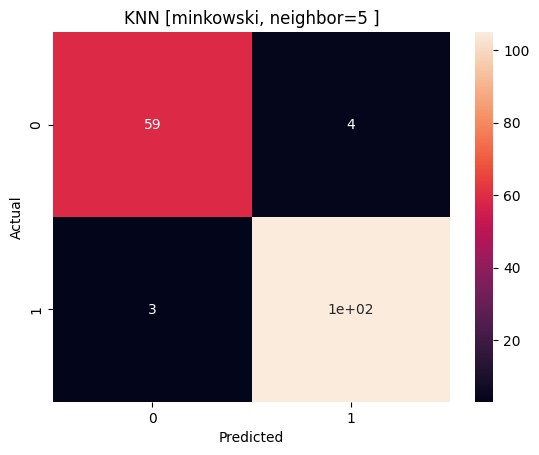

In [ ]:
conf_matrix = pd.crosstab(y_test,y_pred,rownames=["Actual"],colnames=["Predicted"])
sn.heatmap(conf_matrix,annot=True).set(title='KNN [minkowski, neighbor=5 ]')